In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat

In [2]:
df = pd.read_csv('df_ss_t0_area.csv')
df

,Unnamed: 0,Original Spectral Index,Vinyl Peak Area,R2_Vinyl,pxyl Peak Area,R2_pxyl,Vinyl Divide pxyl
0,count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
1,mean,34.333333,253517.395977,0.985645,152947.595518,0.982927,1.658651
2,std,3.162278,1966.300482,0.000736,4496.609495,0.001203,0.043942
3,min,30.000000,249676.235386,0.984889,149315.037798,0.980489,1.573865
4,25%,32.000000,253111.164729,0.985059,149923.909577,0.982323,1.653604
5,50%,34.000000,253758.230718,0.985445,150729.416641,0.983160,1.680618
6,75%,37.000000,254541.868407,0.986260,153688.930918,0.983407,1.686925
7,max,39.000000,256111.873843,0.986842,161033.470444,0.984553,1.704730


In [3]:
filenames = ['df_ss_t0_area.csv', 'df_ss_t30_area.csv','df_ss_t60_area.csv','df_ss_t90_area.csv','df_ss_t120_area.csv']
# Create list of filenames to be read

dataframes = [pd.read_csv(file) for file in filenames]
# Use list comprehension to generate list of read dataframes

mean_ratio = []
std_ratio = []
for file in dataframes:
    mean_ratio.append(file.loc[1,'Vinyl Divide pxyl'])
    std_ratio.append(file.loc[2, 'Vinyl Divide pxyl'])
        
time = [0, 30, 60, 90, 120]

dict = {'Time':time, 'Mean Ratio':mean_ratio, 'Standard Deviation of Ratio':std_ratio}
df = pd.DataFrame(dict)
df

,Time,Mean Ratio,Standard Deviation of Ratio
0,0,1.658651,0.043942
1,30,1.395373,0.022846
2,60,1.222703,0.027512
3,90,1.051867,0.024700
4,120,0.947723,0.026858


In [4]:
# Express the Mean and Std of the Ratios and append them in a list.
l=[]
for index, rows in df.iterrows():
    l.append(ufloat(df.loc[index, 'Mean Ratio'], df.loc[index, 'Standard Deviation of Ratio']))

In [5]:
# Create Conversion and Propagated Standard Deviation Columns

for i in range(0,5):
    df.loc[i,'Conversion'] = ((1 - (l[i]/ l[0]))*100).nominal_value
    df.loc[i,'Propagated Standard Deviation'] = ((1 - (l[i]/ l[0]))*100).std_dev

In [6]:
df

,Time,Mean Ratio,Standard Deviation of Ratio,Conversion,Propagated Standard Deviation
0,0,1.658651,0.043942,0.000000,0.000000
1,30,1.395373,0.022846,15.873000,2.620022
2,60,1.222703,0.027512,26.283256,2.562287
3,90,1.051867,0.024700,36.582947,2.245046
4,120,0.947723,0.026858,42.861787,2.216621


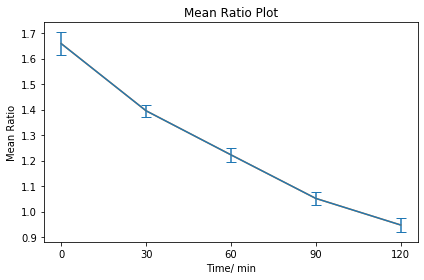

In [7]:
x = df['Time']

y = df['Mean Ratio']

plt.title('Mean Ratio Plot')

plt.xlabel('Time/ min')

plt.ylabel('Mean Ratio')

plt.xticks([0,30,60,90, 120]) # Set xticks to relevant time intervals.

plt.errorbar(x, y, df['Standard Deviation of Ratio'], capsize = 5)

plt.plot(x, y)
    
plt.tight_layout()
plt.show()

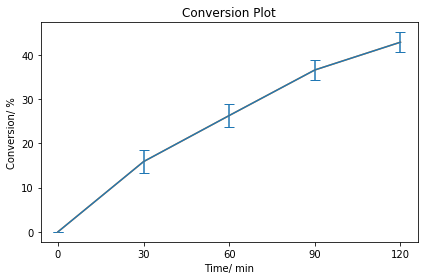

In [8]:
x = df['Time']

y = df['Conversion']

plt.title('Conversion Plot')

plt.xlabel('Time/ min')

plt.ylabel('Conversion/ %')

plt.xticks([0,30,60,90,120]) # Set xticks to relevant time intervals.

plt.errorbar(x, y, df['Propagated Standard Deviation'], capsize = 5)

plt.plot(x, y)
    
plt.tight_layout()
plt.show()